# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/7_yolov3/installation
     
 - Select the right requirements file and run
 
     - cat requirements.txt | xargs -n 1 -L 1 pip install

# About the network

1. Paper on Yolov3: https://arxiv.org/abs/1804.02767

2. Paper on Yolov3-SPP: https://arxiv.org/abs/1903.08589

3. Darknet: https://pjreddie.com/darknet/

4. Blog-1 on yolo: https://machinethink.net/blog/object-detection-with-yolo/

5. Blog-2 on yolo: https://medium.com/@jonathan_hui/real-time-object-detection-with-yolo-yolov2-28b1b93e2088

6. Blog-3 on yolo: https://blog.ekbana.com/training-yolov2-in-a-custom-dataset-6fcf58f65fa2

7. Blog-4 on yolo: https://towardsdatascience.com/yolo-v3-object-detection-53fb7d3bfe6b

8. Blog-5 on yolo: https://blog.insightdatascience.com/how-to-train-your-own-yolov3-detector-from-scratch-224d10e55de2

# Dataset credits
 - https://github.com/thsant/wgisd

In [ ]:
!git clone https://github.com/thsant/wgisd

In [ ]:
!mkdir wgisd/data/labels

In [12]:
!mkdir wgisd/data/images

In [2]:
!cp wgisd/data/*.txt wgisd/data/labels/

In [13]:
!cp wgisd/data/*.jpg wgisd/data/images/

In [17]:
f = open("wgisd/data/classes.txt", 'w');
f.write("Grapes\n");
f.close();

# Required Format - Yolo

## Dataset Directory Structure

        wgisd/data (root)
          |
          |-------------images (img_dir)
          |              |
          |              |------------------img1.jpg
          |              |------------------img2.jpg
          |              |------------------.........(and so on)
          |
          |-----------labels (label_dir)
          |              |
          |              |------------------img1.txt
          |              |------------------img2.txt
          |              |------------------.........(and so on)
          |
          |------------classes.txt 
          

## Classes file
 
     List of classes in every new line.
     The order corresponds to the IDs in annotation files
     
     Eg.
          class1               (------------------------------> if will be 0)
          class2               (------------------------------> if will be 1)
          class3               (------------------------------> if will be 2)
          class4               (------------------------------> if will be 3)
          

## Annotation file format

    CLASS_ID BOX_X_CENTER BOX_Y_CENTER WIDTH BOX_WIDTH BOX_HEIGHT
    
    (All the coordinates should be normalized)
    (X coordinates divided by width of image, Y coordinates divided by height of image)
    
    Ex. (One line per bounding box of object in image)
        class_id x1 y1 w h
        class_id x1 y1 w h
        ..... (and so on)
        

# Training 

In [1]:
import os
import sys
sys.path.append("../../7_yolov3/lib");

In [2]:
from train_detector import Detector

In [3]:
gtf = Detector();

In [4]:
# With evolving parameters validation data is required
# As an example we re keeping val data same as train

In [5]:
img_dir = "wgisd/data/images";
label_dir = "wgisd/data/labels";
class_list_file = "wgisd/data/classes.txt"
gtf.set_train_dataset(img_dir, label_dir, class_list_file, batch_size=2)
gtf.set_val_dataset(img_dir, label_dir)

### Availale model types
- "yolov3";
- "yolov3s";
- "yolov3-spp";
- "yolov3-spp3";
- "yolov3-tiny";
- "yolov3-spp-matrix";
- "csresnext50-panet-spp";

In [6]:
gtf.set_model(model_name="yolov3");

### Hyper-params for evolving params
 - Set evolve as True
 - Set num_generations (Total epochs = num_generations*epochs)
 

### Optimizers
 - "sgd"
 - "adam"

In [7]:
gtf.set_hyperparams(optimizer="sgd", lr=0.00579, multi_scale=True, evolve=True, num_generations=10);

In [ ]:
gtf.Train(num_epochs=10);

# Inference

In [1]:
import os
import sys
from IPython.display import Image
sys.path.append("../../7_yolov3/lib");

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
f = open("wgisd/data/classes.txt");
class_list = f.readlines();
f.close();

In [5]:
model_name = "yolov3";
weights = "weights/best.pt";
gtf.Model(model_name, class_list, weights, use_gpu=True, input_size=416);

Using CUDA device0 _CudaDeviceProperties(name='GeForce GTX 980 Ti', total_memory=6080MB)



image 1/1 tmp/img1.jpg: 288x416 8 Grapes
s, Done. (0.044s)
Results saved to /home/abhi/Desktop/Work/tess_tool/gui/v0.3/obj_det_models/Organization/v0.9_yolov3/example_notebooks/7_yolov3/output
Done. (0.183s)


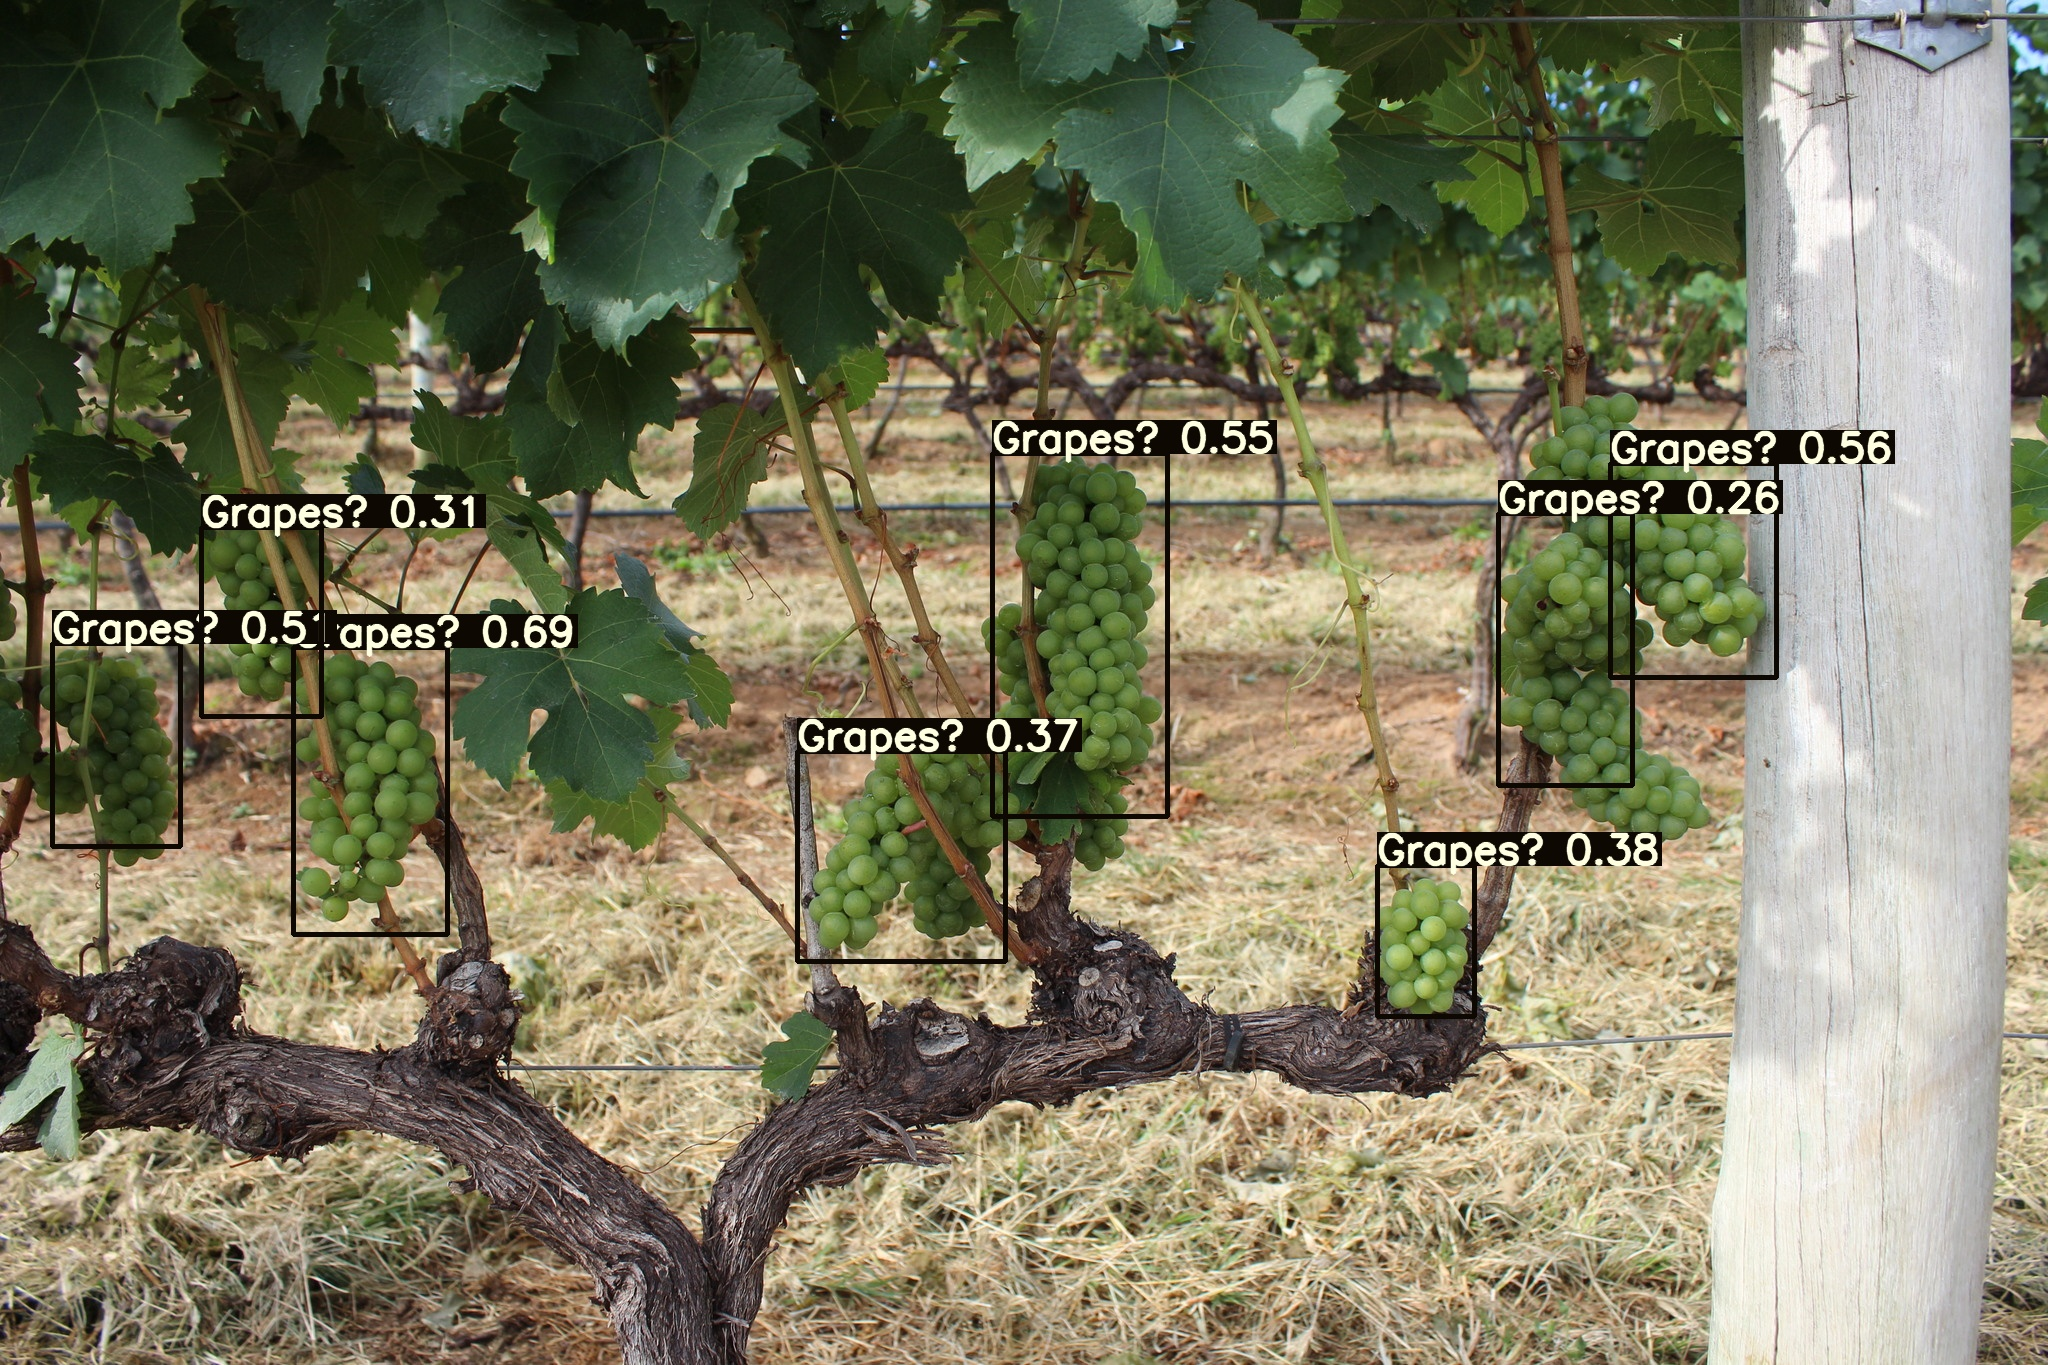

In [6]:
img_path = "../sample_dataset/wine_grape_test/img1.jpg";
gtf.Predict(img_path, conf_thres=0.2, iou_thres=0.5);
Image(filename='output/img1.jpg') 

image 1/1 tmp/img2.jpg: 288x416 13 Grapes
s, Done. (0.032s)
Results saved to /home/abhi/Desktop/Work/tess_tool/gui/v0.3/obj_det_models/Organization/v0.9_yolov3/example_notebooks/7_yolov3/output
Done. (0.174s)


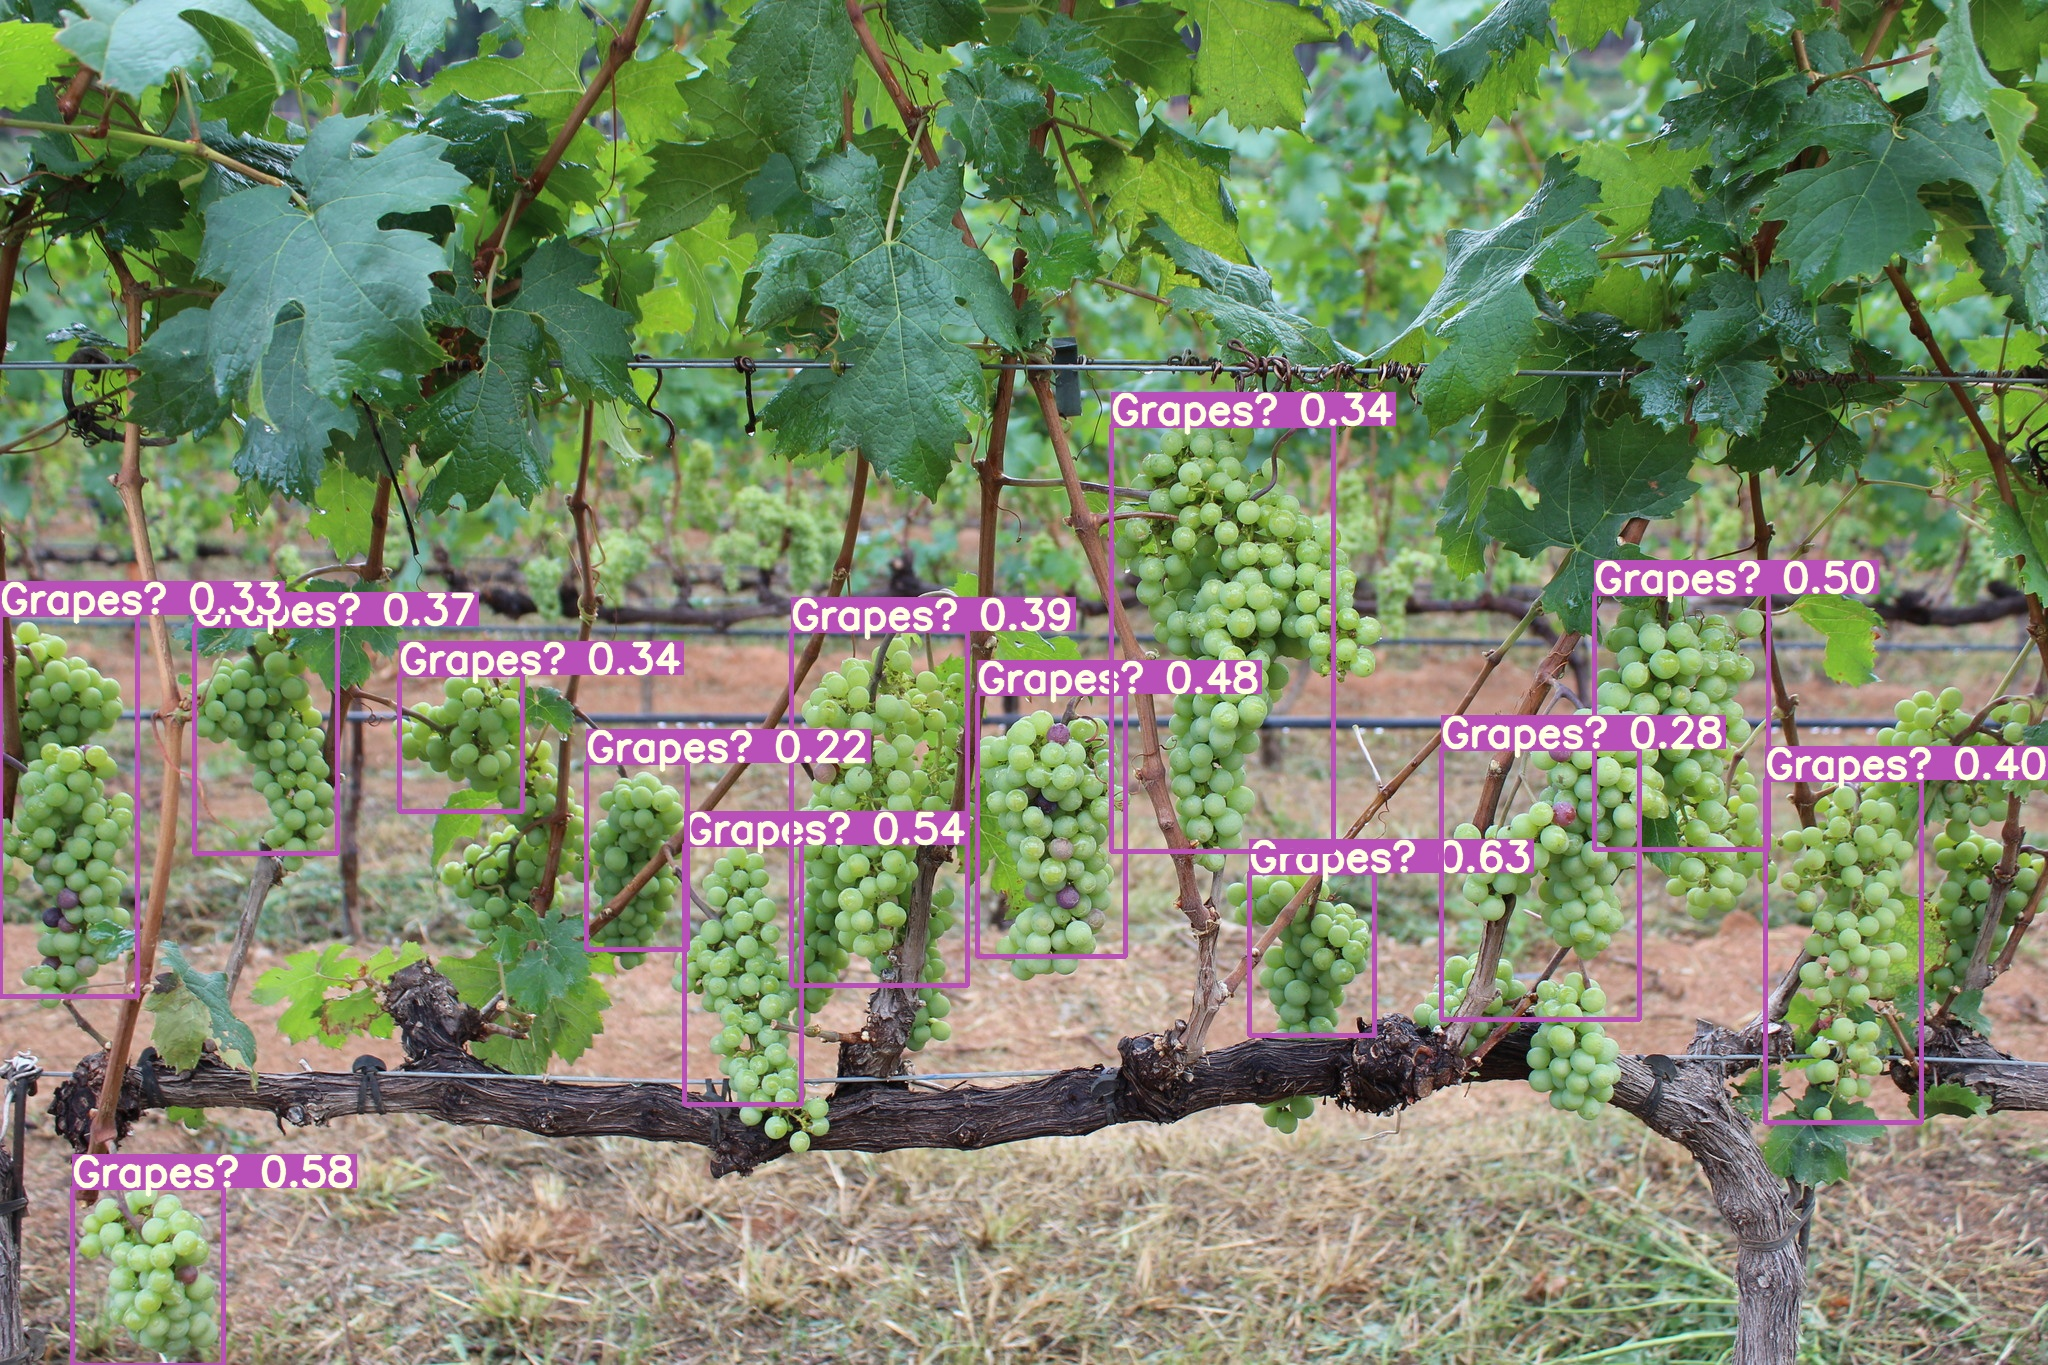

In [8]:
img_path = "../sample_dataset/wine_grape_test/img2.jpg";
gtf.Predict(img_path, conf_thres=0.2, iou_thres=0.5);
Image(filename='output/img2.jpg') 

image 1/1 tmp/img3.jpg: 288x416 7 Grapes
s, Done. (0.028s)
Results saved to /home/abhi/Desktop/Work/tess_tool/gui/v0.3/obj_det_models/Organization/v0.9_yolov3/example_notebooks/7_yolov3/output
Done. (0.160s)


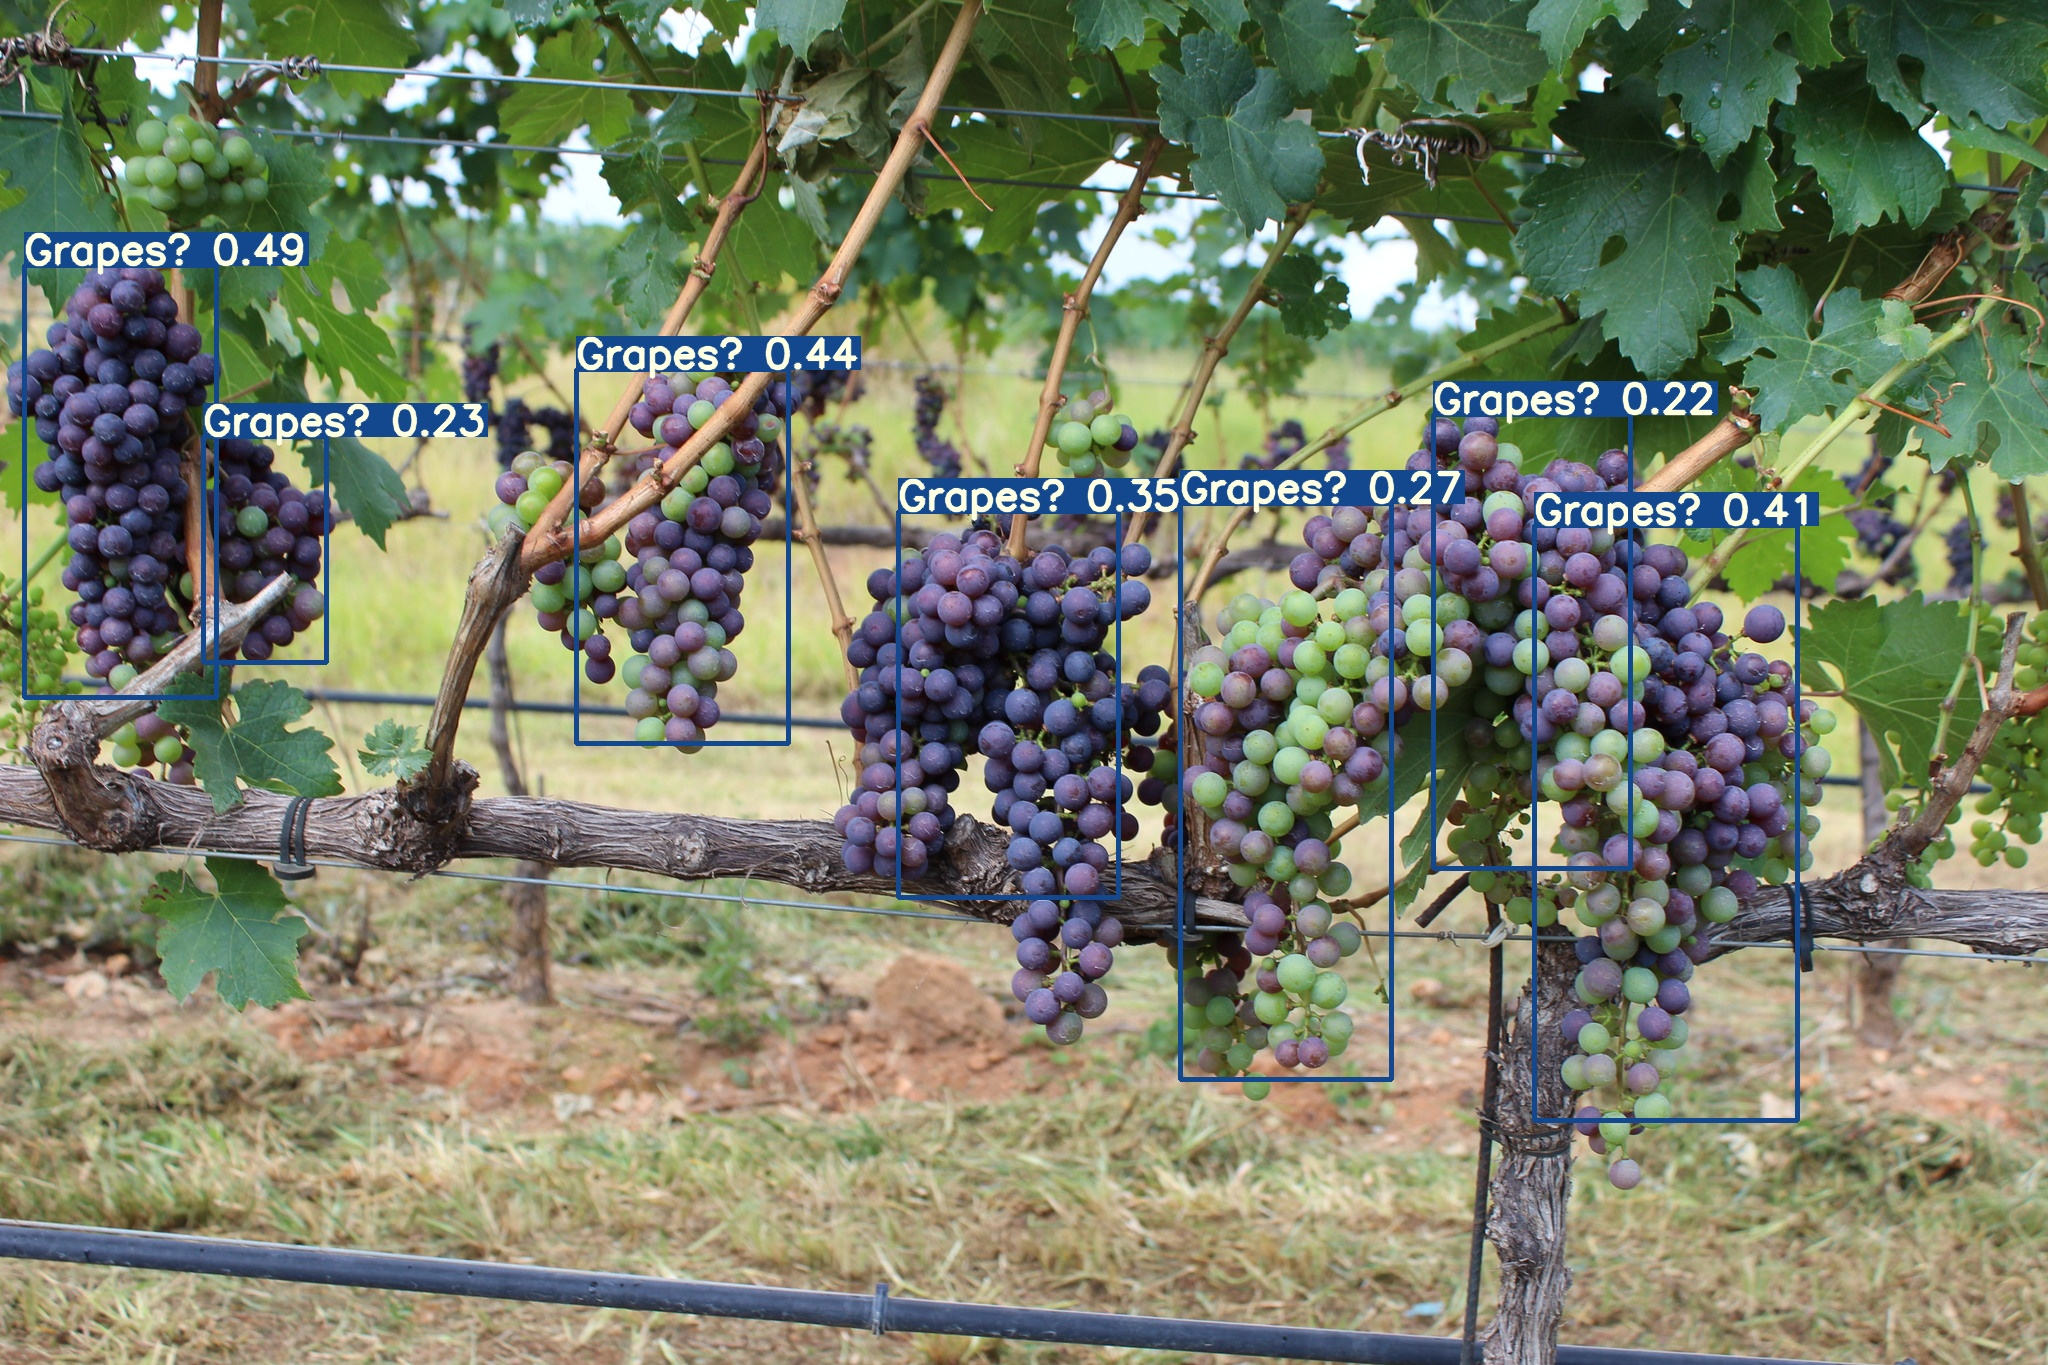

In [16]:
img_path = "../sample_dataset/wine_grape_test/img3.jpg";
gtf.Predict(img_path, conf_thres=0.2, iou_thres=0.5);
Image(filename='output/img3.jpg') 

image 1/1 tmp/img4.jpg: 288x416 2 Grapes
s, Done. (0.030s)
Results saved to /home/abhi/Desktop/Work/tess_tool/gui/v0.3/obj_det_models/Organization/v0.9_yolov3/example_notebooks/7_yolov3/output
Done. (0.161s)


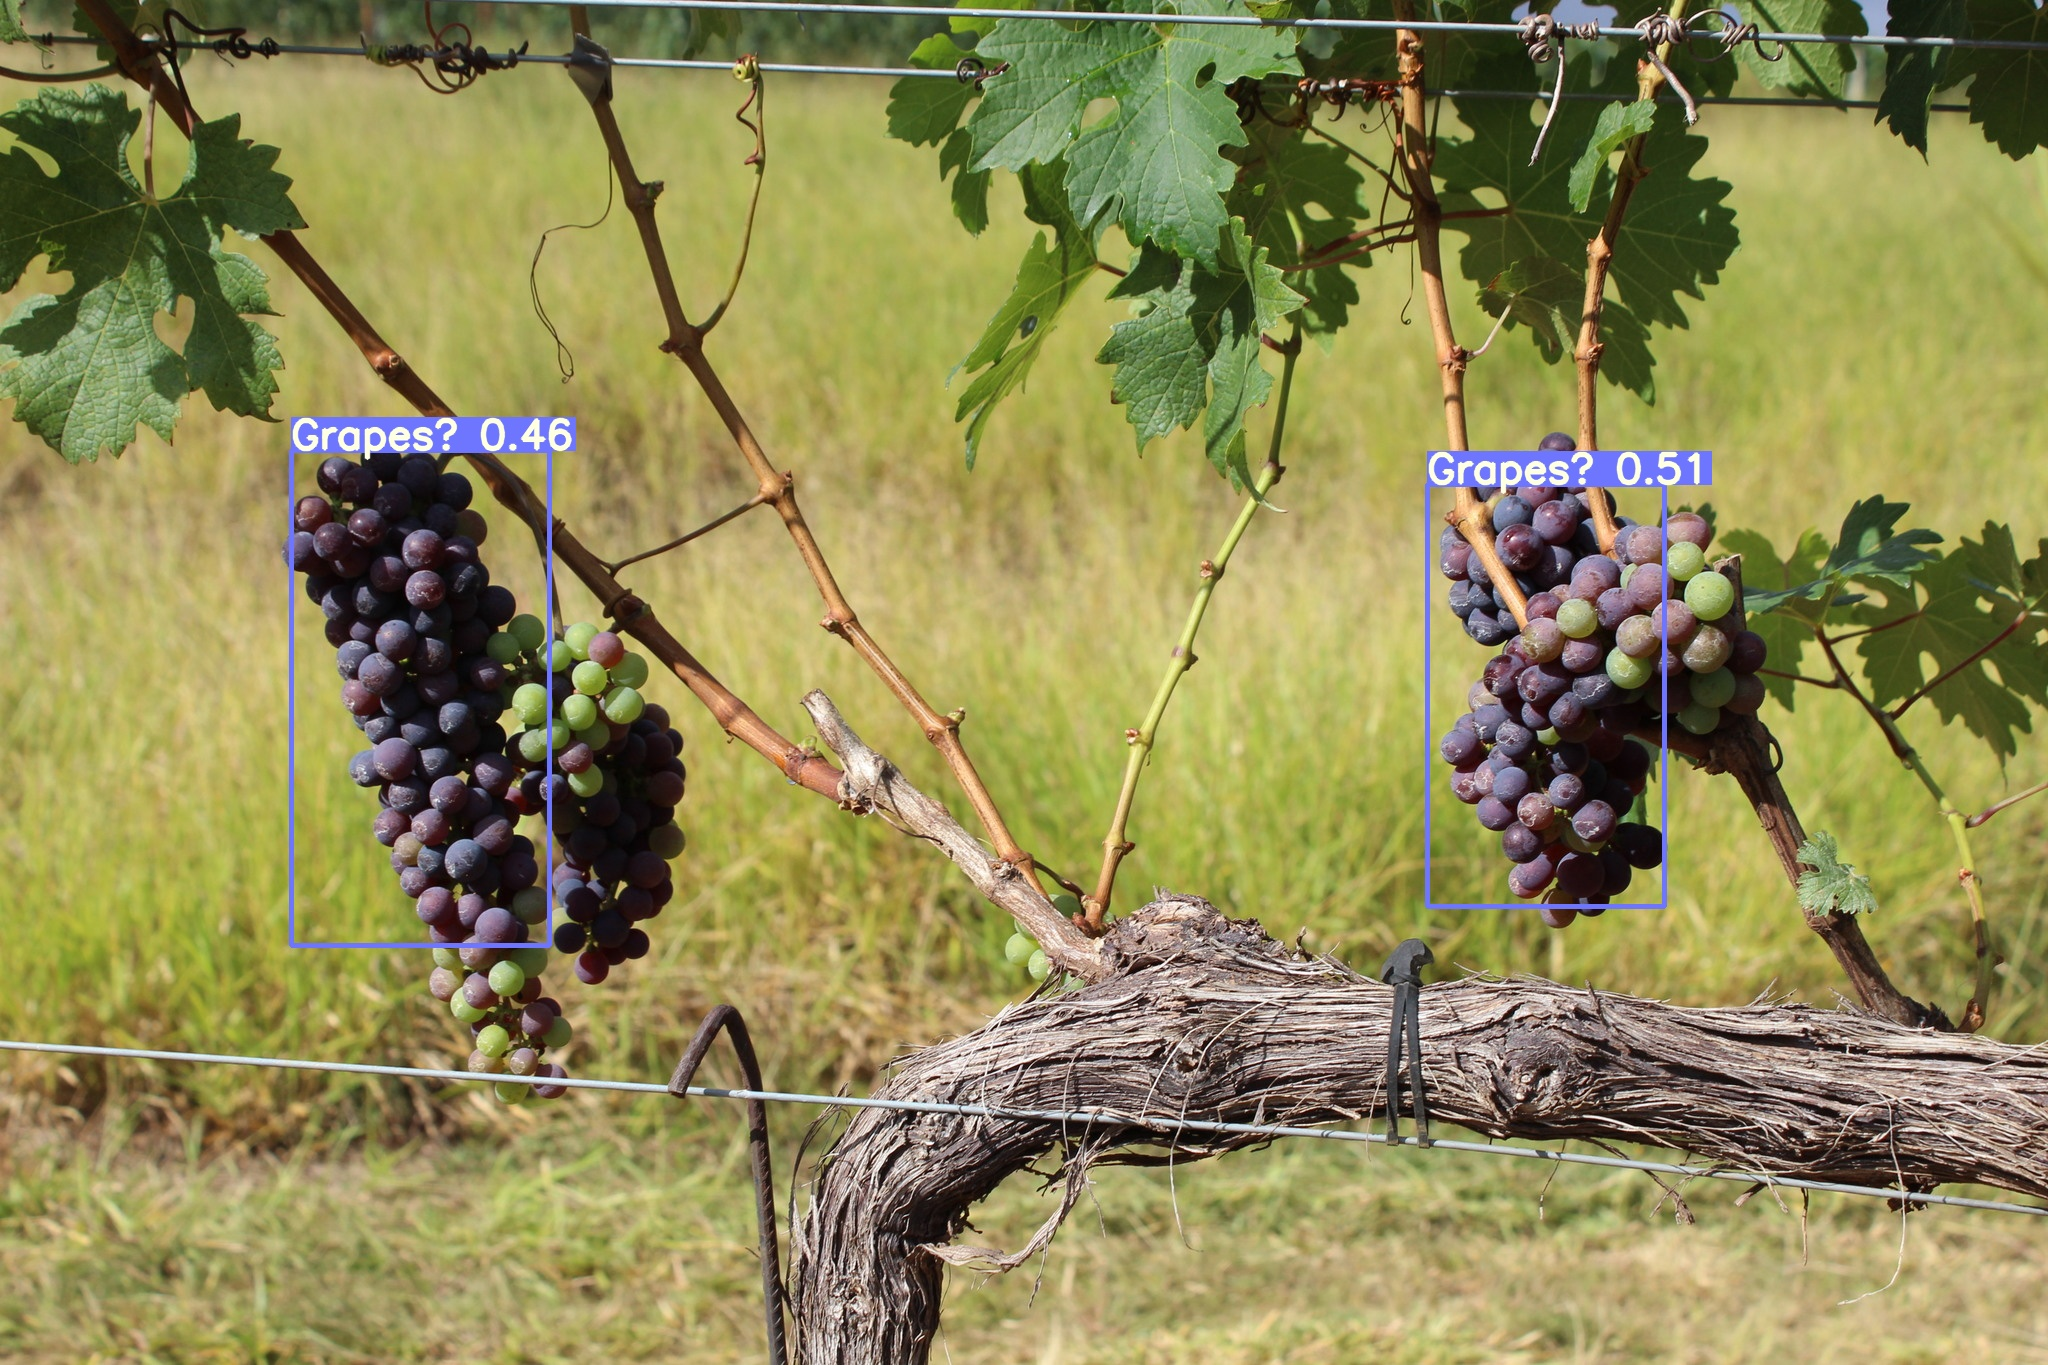

In [17]:
img_path = "../sample_dataset/wine_grape_test/img4.jpg";
gtf.Predict(img_path, conf_thres=0.2, iou_thres=0.5);
Image(filename='output/img4.jpg') 

image 1/1 tmp/img5.jpg: 288x416 12 Grapes
s, Done. (0.036s)
Results saved to /home/abhi/Desktop/Work/tess_tool/gui/v0.3/obj_det_models/Organization/v0.9_yolov3/example_notebooks/7_yolov3/output
Done. (0.174s)


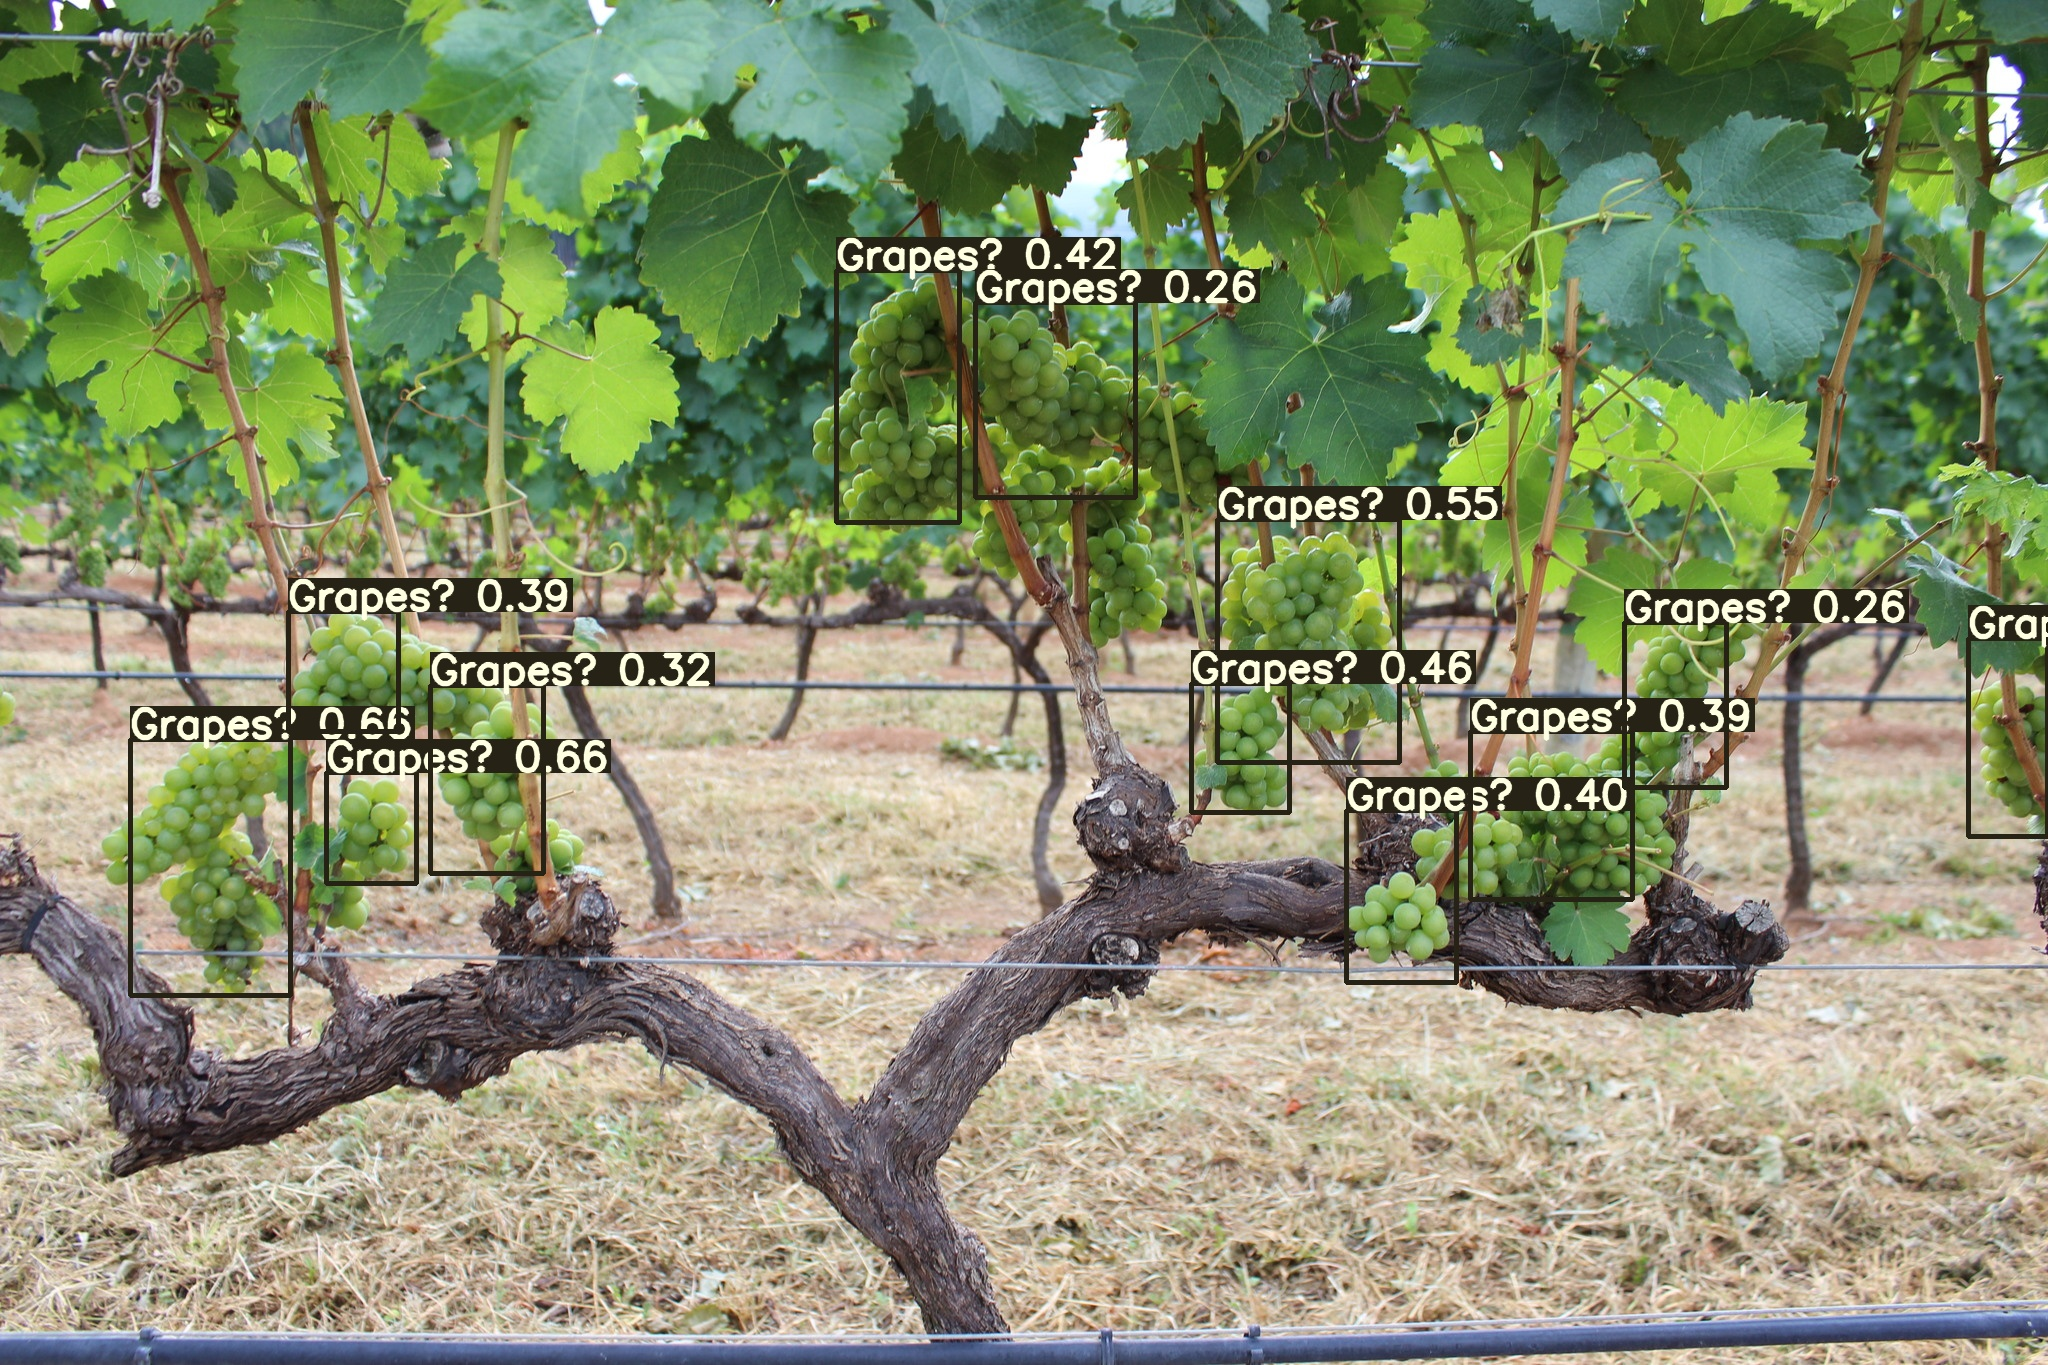

In [18]:
img_path = "../sample_dataset/wine_grape_test/img5.jpg";
gtf.Predict(img_path, conf_thres=0.2, iou_thres=0.5);
Image(filename='output/img5.jpg') 